In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load data
HD_data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
HD_data = HD_data.astype(int)
#HD_data

In [3]:
# To check if anything is null

HD_data.isnull().sum()    

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
#max(HD_data["PhysHlth"])
#min(HD_data["PhysHlth"])


"""
Low PhysHlth: 0-10
Mid PhysHlth: 11 - 20 
High PhysHlth: 21 - 30 

"""
bins = [0, 10, 20, float('inf')]  
labels = ['Low PhysHlth', 'Mid PhysHlth', 'High PhysHlth']


HD_data["PhysHlth_category"] = pd.cut(HD_data['PhysHlth'], bins=bins, labels=labels, right=False)

In [5]:
#print(max(HD_data["BMI"]))
#print(min(HD_data["BMI"]))
'''
Underweight: BMI less than 18.5
Normal weight: BMI 18.5 to 24.9
Overweight: BMI 25 to 29.9
Obesity: BMI 30 to 40
Severe obesity: BMI over 40
'''

#HD_data["BMI"]

#import pandas as pd


# Define the bins and labels for BMI categories
bins = [0, 19, 25, 30, 40, float('inf')]  # BMI category boundaries
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity', 'Severe obesity']  # BMI category labels

# Divide BMI values into categories
HD_data['BMI_category'] = pd.cut(HD_data['BMI'], bins=bins, labels=labels, right=False)

In [6]:
#print(max(HD_data["MentHlth"]))
#print(min(HD_data["MentHlth"]))


"""
Will divide into 3 groups
Low Mental Health: 0 - 10 
Mid Mental Health: 11 - 20
High Mental Health: 21 - 30 
"""

bins = [0, 10, 20, float('inf')]  
labels = ['Low Mental Health', 'Mid Mental Health', 'High Mental Health']  


HD_data['MentHlth_category'] = pd.cut(HD_data['MentHlth'], bins=bins, labels=labels, right=False)

#print(HD_data['MentHlth_category'])

In [7]:
#print(max(HD_data["Age"]))
#print(min(HD_data["Age"]))

'''
Age division -> 3 groups 
Young Adult: 18 - 35 : 1 - 5
Adult -> 36 - 65 5 - 9
Elder -> 65+ Senior 10 - 13

'''

bins = [1, 5, 10, float('inf')]  
labels = ['Young Adult', 'Adult', 'Elder']  


HD_data['Age_category'] = pd.cut(HD_data['Age'], bins=bins, labels=labels, right=False)

In [8]:
#max(HD_data["Income"])
#min(HD_data["Income"])


"""
Divide into 3 groups

Low Income: 1 - 3
Mid Income: 4 - 6
High Income: 7 - 8 

"""


bins = [1, 4, 7, float('inf')]  
labels = ['Low Income', 'Mid Income', 'High Income']  


HD_data['Income_category'] = pd.cut(HD_data['Income'], bins=bins, labels=labels, right=False)

In [9]:
"""
Low Education: 1 - 2
Mid Education: 3 - 4
High Education: 5 - 6 

"""


bins = [1, 3, 5, float('inf')]  
labels = ['Low Education', 'Mid Education', 'High Education']


HD_data["Education_category"] = pd.cut(HD_data['Education'], bins=bins, labels=labels, right=False)

#print(HD_data['Education_category'])

In [10]:
# Correctly create 'Diabetes_Combined' before using it
HD_data['Diabetes'] = np.where(HD_data['Diabetes'].isin([1, 2]), 1, 0)



# Combine columns with correct referencing
HD_data['Combined'] = HD_data['Stroke'].astype(str) + '_' + HD_data['HeartDiseaseorAttack'].astype(str) + '_' + HD_data['Diabetes'].astype(str)

# Map numerical columns to categorical labels
categorical_mappings = {
    'HighBP': {0: 'No', 1: 'Yes'},
    'HighChol': {0: 'No', 1: 'Yes'},
    'CholCheck': {0: 'No', 1: 'Yes'},
    'Smoker': {0: 'No', 1: 'Yes'},
    'PhysActivity': {0: 'No', 1: 'Yes'},
    'Fruits': {0: 'No', 1: 'Yes'},
    'Veggies': {0: 'No', 1: 'Yes'},
    'HvyAlcoholConsump': {0: 'No', 1: 'Yes'},
    'AnyHealthcare': {0: 'No', 1: 'Yes'},
    'NoDocbcCost': {0: 'No', 1: 'Yes'},
    'DiffWalk': {0: 'No', 1: 'Yes'},
    'Sex': {0: 'Male', 1: 'Female'}
}

for column, mapping in categorical_mappings.items():
    if column in HD_data.columns:
        HD_data[column] = HD_data[column].map(mapping)



In [11]:
def plot_data(column):
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    ax = sns.countplot(x='Combined', hue=column, data=HD_data, palette='viridis')
    plt.title(f'Distribution of {column} by Combined Categories')
    plt.xlabel('Combined Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    # Update the legend
    handles, labels = ax.get_legend_handles_labels()
    labels = ['No', 'Yes'] if set(labels) == {'0', '1'} else labels
    ax.legend(handles=handles, labels=labels, title=column, loc='upper right')
    plt.show()

# Exclude columns not needed in the dropdown
columns_to_exclude = ['Combined', 'BMI', 'MentHlth', "PhysHlth", "Age", "Income", "Education"]

# Create a dropdown and link it to the plot function
columns_to_plot = [col for col in HD_data.columns if col not in columns_to_exclude]
dropdown = Dropdown(options=columns_to_plot, description='Select Variable:')
interact(plot_data, column=dropdown)


interactive(children=(Dropdown(description='Select Variable:', options=('HeartDiseaseorAttack', 'HighBP', 'Hig…

<function __main__.plot_data(column)>

In [12]:
HD_data_filter = HD_data[HD_data["Combined"] != "0_0_0"]

def plot_data(column):
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    ax = sns.countplot(x='Combined', hue=column, data=HD_data_filter, palette='viridis')
    plt.title(f'Distribution of {column} by Combined Categories')
    plt.xlabel('Combined Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    handles, labels = ax.get_legend_handles_labels()
    # Adjust labels based on expected unique values in the data
    unique_labels = set(HD_data_filter[column].dropna().unique())
    if unique_labels == {'Yes', 'No'}:
        labels = ['No', 'Yes']
    ax.legend(handles=handles, labels=labels, title=column, loc='upper right')
    plt.show()

# Specify columns to exclude from the dropdown
columns_to_exclude = ['Combined', 'BMI', 'MentHlth', "PhysHlth", "Age", "Income", "Education"]  # Add more columns as needed

# Create a dropdown and link it to the plot function
columns_to_plot = [col for col in HD_data.columns if col not in columns_to_exclude]
dropdown = Dropdown(options=columns_to_plot, description='Select Variable:')
interact(plot_data, column=dropdown)


interactive(children=(Dropdown(description='Select Variable:', options=('HeartDiseaseorAttack', 'HighBP', 'Hig…

<function __main__.plot_data(column)>

In [13]:
#Only Highly Interested 

def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_%_")
    percentages = percentages.round(2)
    percentages = percentages.astype(str) + "%"
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['HighBP', 'HighChol', 'PhysActivity','Veggies',
            'DiffWalk', "BMI_category", "Age_category"]
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}



category_dropdown = widgets.Dropdown(
    options=['HighBP', 'HighChol', 'PhysActivity','Veggies',
            'DiffWalk', "BMI_category", "Age_category"],
    description='Select Variable:',
    disabled=False
)

# Define function to update output
def update_output(category):
    table = create_contingency_table(HD_data, category)
    display(table)

# Create an interactive widget and display the dropdown
widgets.interactive(update_output, category=category_dropdown)







interactive(children=(Dropdown(description='Select Variable:', options=('HighBP', 'HighChol', 'PhysActivity', …

In [14]:
#Only NOT Interesting



def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_%_")
    percentages = percentages.round(2)
    percentages = percentages.astype(str) + "%"
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['CholCheck', 'Smoker','Fruits','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex', "MentHlth_category", "Income_category", "Education_category", "GenHlth"]
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}



category_dropdown = widgets.Dropdown(
    options=['CholCheck', 'Smoker','Fruits','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex', "MentHlth_category", "Income_category", "Education_category", "GenHlth"],
    description='Select Variable:',
    disabled=False
)

# Define function to update output
def update_output(category):
    table = create_contingency_table(HD_data, category)
    display(table)

# Create an interactive widget and display the dropdown
widgets.interactive(update_output, category=category_dropdown)




interactive(children=(Dropdown(description='Select Variable:', options=('CholCheck', 'Smoker', 'Fruits', 'HvyA…

In [15]:
#HD_data['Disease_Combined'] = HD_data.apply(lambda row: f"{row['HeartDiseaseorAttack']}{row['Stroke']}_{row['Diabetes']}", axis=1)

def calculate_conditional_entropy(data, x, given_y):
    """Calculate the conditional entropy H(X|Y)."""
    joint_prob = pd.crosstab(data[x], data[given_y], normalize=True)
    marginal_y = data[given_y].value_counts(normalize=True)
    conditional_prob = joint_prob.divide(marginal_y, axis=1)
    log_conditional = np.log2(conditional_prob).replace(-np.inf, 0)
    conditional_entropy = -(joint_prob * log_conditional).sum().sum()
    return conditional_entropy

def plot_conditional_entropy(disease_combination):
    subset = HD_data[HD_data['Combined'] == disease_combination]
    conditional_entropy_values = {
        var: calculate_conditional_entropy(subset, var, 'Combined')
        for var in categories
    }
    sorted_conditional_entropy_values = sorted(conditional_entropy_values.items(), key=lambda item: item[1], reverse=True)

    plt.figure(figsize=(10, 8))
    plt.barh([k for k, v in sorted_conditional_entropy_values], [v for k, v in sorted_conditional_entropy_values], color='lightcoral')
    plt.xlabel('Conditional Entropy')
    plt.title(f'Conditional Entropy of Health Indicators Given {disease_combination}')
    plt.gca().invert_yaxis()
    plt.show()

# Setup for the interactive widget
disease_combinations = HD_data['Combined'].unique()
dropdown = Dropdown(options=disease_combinations)
interact(plot_conditional_entropy, disease_combination=dropdown)

interactive(children=(Dropdown(description='disease_combination', options=('0_0_0', '0_1_1', '0_0_1', '1_0_0',…

<function __main__.plot_conditional_entropy(disease_combination)>

In [16]:



# Defined variables for entropy calculation
categories = ['HighBP', 'HighChol', 'PhysActivity', 'Veggies', 'DiffWalk', 'BMI_category', 'Age_category', 
              'PhysHlth_category']

# Calculate entropy for the selected variables
def calculate_entropy(data, variable):
    counts = data[variable].value_counts(normalize=True, sort=False)
    return entropy(counts, base=np.e) if not counts.empty else 0
    
entropy_values = {var: calculate_entropy(HD_data, var) for var in categories}


def plot_compared_entropy(bmi_cat, age_cat, phys_health_cat):
    plt.figure(figsize=(12, 8))

    # Filter entropy values to include only selected categories
    filtered_entropy = {key: entropy_values[key] for key in categories}

    # Plotting
    names = list(filtered_entropy.keys())  # Categories names
    values = list(filtered_entropy.values())  # Corresponding entropy values

    # Adding selected categories with their proportions (for dynamic visualization)
    names += ['Selected BMI Category: ' + bmi_cat, 'Selected Age Category: ' + age_cat, 'Selected PhysHlth Category: ' + phys_health_cat]
    values += [HD_data[HD_data['BMI_category'] == bmi_cat]['BMI_category'].count() / len(HD_data),
               HD_data[HD_data['Age_category'] == age_cat]['Age_category'].count() / len(HD_data),
               HD_data[HD_data['PhysHlth_category'] == phys_health_cat]['PhysHlth_category'].count() / len(HD_data)]

    # Sort by values for better visualization
    names, values = zip(*sorted(zip(names, values), key=lambda x: x[1], reverse=True))

    plt.barh(names, values, color='skyblue')
    plt.xlabel('Proportion / Entropy')
    plt.title('Entropy and Proportion of Selected Health Indicators')
    plt.gca().invert_yaxis()  # Highest values at the top
    plt.show()

# Widgets for interactive selection
bmi_dropdown = widgets.Dropdown(
    options=HD_data['BMI_category'].unique().tolist(),
    description='BMI Category:'
)

age_dropdown = widgets.Dropdown(
    options=HD_data['Age_category'].unique().tolist(),
    description='Age Category:'
)

phys_health_dropdown = widgets.Dropdown(
    options=HD_data['PhysHlth_category'].unique().tolist(),
    description='Physical Health Category:'
)

widgets.interact(plot_compared_entropy, bmi_cat=bmi_dropdown, age_cat=age_dropdown, phys_health_cat=phys_health_dropdown)

interactive(children=(Dropdown(description='BMI Category:', options=('Severe obesity', 'Overweight', 'Normal w…

<function __main__.plot_compared_entropy(bmi_cat, age_cat, phys_health_cat)>

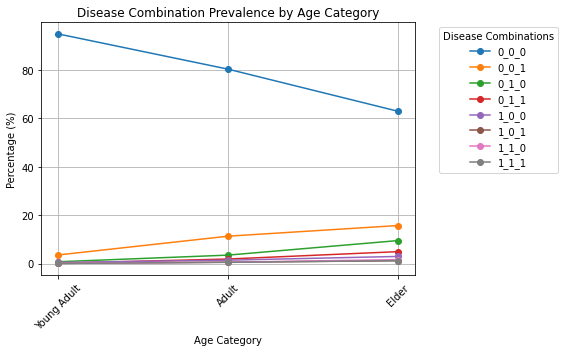

In [17]:
disease_counts = HD_data.groupby(['Age_category', 'Combined']).size().unstack(fill_value=0)

#Calculate percentages within each age category
disease_percentages = disease_counts.div(disease_counts.sum(axis=1), axis=0) * 100


plt.figure(figsize=(8, 5))

#Plot a line for each disease combination
for column in disease_percentages.columns:
    plt.plot(disease_percentages.index, disease_percentages[column], marker='o', label=str(column))

plt.title('Disease Combination Prevalence by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Disease Combinations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

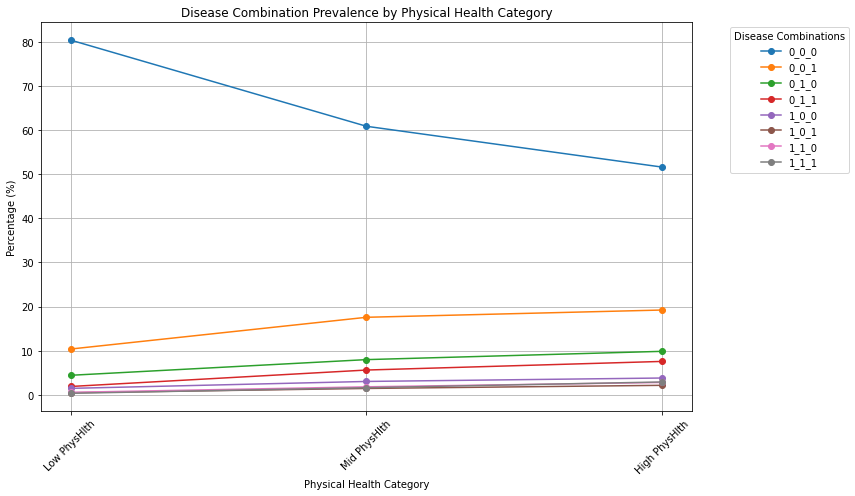

Combined               0_0_0      0_0_1     0_1_0     0_1_1     1_0_0  \
PhysHlth_category                                                       
Low PhysHlth       80.411662  10.382324  4.433392  1.896415  1.471091   
Mid PhysHlth       60.869872  17.580713  7.986747  5.625264  3.038207   
High PhysHlth      51.612027  19.227934  9.866149  7.580989  3.817653   

Combined              1_0_1     1_1_0     1_1_1  
PhysHlth_category                                
Low PhysHlth       0.483345  0.569439  0.352332  
Mid PhysHlth       1.452136  1.825744  1.621317  
High PhysHlth      2.161009  2.808923  2.925315  


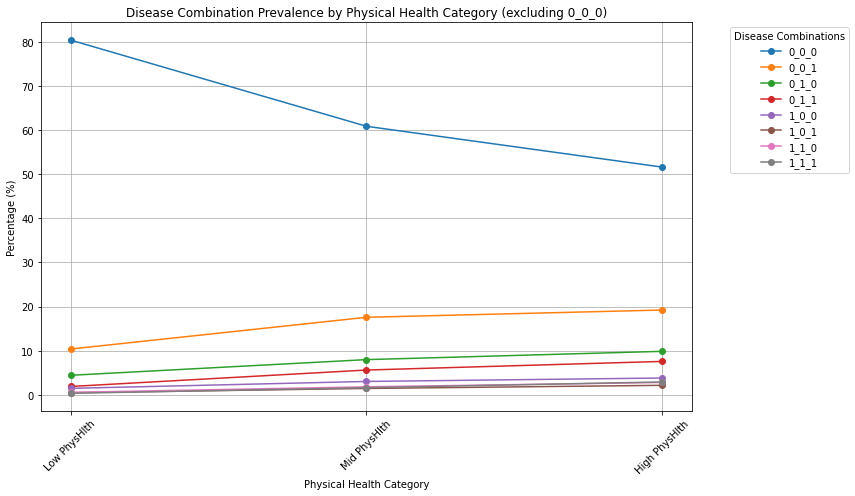

In [18]:
#Group by 'PhysHlth_Category' and 'Disease_Combined', then count instances
disease_counts = HD_data.groupby(['PhysHlth_category', 'Combined']).size().unstack(fill_value=0)

#Calculate percentages within each physical health category
disease_percentages = disease_counts.div(disease_counts.sum(axis=1), axis=0) * 100

#Check the transformed data
#print(disease_percentages.head())


plt.figure(figsize=(12, 7))

#Plot a line for each disease combination
for column in disease_percentages.columns:
    plt.plot(disease_percentages.index, disease_percentages[column], marker='o', label=str(column))

plt.title('Disease Combination Prevalence by Physical Health Category')
plt.xlabel('Physical Health Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Disease Combinations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()
#Plot without the 0_0_0

#Filter out rows where 'Disease_Combined' is '0_0_0'
filtered_data = HD_data[HD_data['Combined'] != '00_0']

#Group by 'PhysHlth_Category' and 'Disease_Combined', then count instances
disease_counts = filtered_data.groupby(['PhysHlth_category', 'Combined']).size().unstack(fill_value=0)

#Calculate percentages within each physical health category
disease_percentages = disease_counts.div(disease_counts.sum(axis=1), axis=0) * 100

#Check the transformed data
print(disease_percentages.head())

#Plotting
plt.figure(figsize=(12, 7))

#Plot a line for each disease combination
for column in disease_percentages.columns:
    plt.plot(disease_percentages.index, disease_percentages[column], marker='o', label=str(column))

plt.title('Disease Combination Prevalence by Physical Health Category (excluding 0_0_0)')
plt.xlabel('Physical Health Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Disease Combinations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [19]:
#HD_data['Disease_Combined'] = HD_data.apply(lambda row: f"{row['HeartDiseaseorAttack']}_{row['Stroke']}_{row['Diabetes']}", axis=1)

# List of interesting categories for the dropdown
interesting_category = [
    'HighBP', 'HighChol', 'BMI_category', 'PhysActivity', 'Veggies',
    'PhysHlth_category', 'DiffWalk', 'Age_category'
]

def update_visuals(category):
    # Group and count instances for the dataset
    full_counts = HD_data.groupby([category, 'Combined']).size().unstack(fill_value=0)
    
    # Calculate percentages
    full_percentages = full_counts.div(full_counts.sum(axis=1), axis=0) * 100
    
    # Print contingency table for the selected category with formatting
    print(f"Contingency Table for {category} (Including '0_0_0'):")
    display(full_percentages.style.format("{:.2f}%"))

    # First Plot - Including '0_0_0'
    fig1, ax1 = plt.subplots(figsize=(12, 6))
    for column in full_percentages.columns:
        ax1.plot(full_percentages.index, full_percentages[column], marker='o', label=str(column))
    ax1.set_title('With 0_0_0')
    ax1.set_xlabel(category)
    ax1.set_ylabel('Percentage (%)')
    ax1.legend(title='Disease Combinations', loc='best')
    ax1.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Second Plot - Excluding '0_0_0' from display only
    non_zero_percentages = full_percentages.drop(columns=['0_0_0'])  # Drop '0_0_0' for zoom calculation
    fig2, ax2 = plt.subplots(figsize=(12, 6))
    min_value = non_zero_percentages.min().min()  # Find the minimum value across all columns
    max_value = non_zero_percentages.max().max()  # Find the maximum value across all columns
    for column in full_percentages.columns:
        if column != '0_0_0':
            ax2.plot(full_percentages.index, full_percentages[column], marker='o', label=str(column))
    ax2.set_title('Without 0_0_0')
    ax2.set_xlabel(category)
    ax2.set_ylabel('Percentage (%)')
    ax2.set_ylim([min_value - 5, max_value + 5])  # Adjusted zoom level
    ax2.legend(title='Disease Combinations', loc='best')
    ax2.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

dropdown = Dropdown(options=interesting_category)
interact(update_visuals, category=dropdown)

interactive(children=(Dropdown(description='category', options=('HighBP', 'HighChol', 'BMI_category', 'PhysAct…

<function __main__.update_visuals(category)>